In [15]:
import re
import time
import io
import os
import json
import pandas as pd
from optparse import OptionParser
from pandas import DataFrame, read_csv
path='./data/'

In [64]:
#import pickle
#with open(path+'allData.pkl', "rb") as fout:
   #  dic=pickle.load(fout)



In [17]:
#from pandas.io.json import json_normalize
#df = pd.DataFrame.from_dict(json_normalize(dic), orient='columns')
#df = df.T
#df.head()
#allData = pd.DataFrame(columns=['docClass', 'classID', 'className', 'docTitle', 'docs'])
#allData

In [18]:
#import pandas as pd
#for i in range(len(df)):
#    docClass, classID, className, docTitle, docs = df.iloc[i, 0]
#    allData.loc[i, 'docClass'] = docClass
#    allData.loc[i, 'classID'] = classID
#    allData.loc[i, 'className'] = className
#    allData.loc[i, 'docTitle'] = docTitle
#    allData.loc[i, 'docs'] = docs
#    if i % 1000 == 0:
#        print(i)
#allData.head()
#pd.to_pickle(allData, 'allData.pkl')

In [68]:
import pickle
with open('allData.pkl', "rb") as fout:#開啟這個allData.pkl的檔案，用二進制方式讀取，這個動作代稱為fout
     allData=pickle.load(fout)
allData

,docClass,classID,className,docTitle,docs
0,環保,148513668543221,地球公民基金會,"""【12/26 為下一代而走 反空污、抗暖化大遊行】\n",今天 早上 ， 我們 與 台灣 健康 空氣 行動 聯盟 的 夥伴 一起 到 總統府 前開 記...
1,環保,148513668543221,地球公民基金會,"""【高雄講座】12/4 跨國之鏡—韓國環境運動聯合參訪分享會（吳如媚）\n",你 知道 東亞 最大 的 環境 組織 是 誰 嗎 ？ 超過 五十個 分支 的 韓國 環境 運...
2,環保,148513668543221,地球公民基金會,"""【滿口仁義道德、卻一肚子OOXX的農委會！】 \n",今天 區委 會 的 第次 大會 ， 審議 全國 區域 計畫 修正案 草案 的 環境 敏感區 ...
3,環保,148513668543221,地球公民基金會,"""【九月農地悲歌！農舍修法轉彎、違章工廠就地合法】\n",白米 炸彈 客 的 電影 情節 真實 上演 ， 今天 宜蘭縣 部份 農會 與 房地 仲介 相...
4,環保,148513668543221,地球公民基金會,"""【好山好水好政治—地球公民政治參與原則說明】\n",政治 ， 對 你 而言 是 什麼 ？ 當你 在 關注 地球 公民 基金會 ， 看見 我們 陸...
5,環保,148513668543221,地球公民基金會,"""【核三重啟，要回到原點？還是加速能源改革？】\n",核三 失火 ， 全台 備轉 容量 降低 ， 為 了 避免 限電 危機 ， 昨日 原能 會 已...
6,環保,148513668543221,地球公民基金會,"""【保護黑琵、人鳥共存】\n",今日 鳥類 、 明日 人類 。 保護 其他 生命 ， 人類 才 得以 健康 地 存活 下去 ...
7,環保,148513668543221,地球公民基金會,"""【 Earth Day Taiwan 地球的事就是我們的事】\n",台北 地球日 已 邁入 第八年 ， 今明兩天 在 臺灣 博物館 的 綠色 市集 ， 地球 公...
8,環保,148513668543221,地球公民基金會,"""【環境敏感區與礦場的結該如何解?】\n",環境 敏感區 採礦 擴張 再 一起 ！ 向陽 礦業 ， 主要 生產 雲母 礦 開採區 除了 ...
9,環保,148513668543221,地球公民基金會,"""【東海岸要喘息！】\n",把關 機制 應 建立 ， 大型 開發 全面 退出 花 東海岸 內政部 營建 署 預計 從 月...


In [76]:
mergeData = allData.groupby(['docClass', 'className'])['docs'].apply(' '.join).reset_index()#選出若docClass及className相同的合併
#並將docs的內容中間分隔一個空格相加，接著還原索引列格式
mergeData

,docClass,className,docs
0,動物,"""HOTAC",非常 直白 ， 非常 感慨 ， 也 讓 人 有 更深 的 省思 更 多 的 卻是 對 制度 ...
1,動物,"""愛貓協會(NGO",敬請 轉貼 歡迎 參觀 暫停 送養會 一次 ， 洽談 認養 及 預約 一般 日 晚上 時間 ...
2,動物,APA中華民國保護動物協會,關心 流浪 動物 的 朋友 們 ， 最 擔心 的 就是 汪 喵 棄養 的 問題 ， 告訴您 ...
3,動物,Rose的流浪動物花園,這是 一個 悲傷 的 故事 ， 我們 期待 它 有 個 溫暖 的 結局 兩隻 在 實驗室 過...
4,動物,Taiwan SPCA 台灣防止虐待動物協會,剛才 沒有 看到 李奧納多 紀錄片 的 朋友 可以 到 這邊 線上 觀看 ！ 李奧納多 前往...
5,動物,g0v.tw 台灣零時政府,報導 者 是 台灣 少數 非營利 網路 媒體 之一 ， 總主筆 李雪莉 也 受邀 擔任 本屆...
6,動物,古都保存再生文教基金會,謝謝 各位 夥伴 過去 的 支持 年 也 請 多多指教 古都 的 策略 是 台南市 政府 將...
7,動物,台北鳥會野鳥救傷中心,兩日 台北 鳥會 救傷 中心 沒有 營業 ， 若要 送傷 鳥 到 義診 醫院 也 記得 先 ...
8,動物,台北鳥會關渡自然公園管理處,申請 截止日 延長 至 年月日 止年 關渡 國際 自然 藝術 季 來自 真實 的 故事 徵求...
9,動物,台南市關懷流浪動物協會,送養 報名 開始 囉 手邊 有犬貓 待 送 的 民眾 請 別錯過 了 ！ 報名 方式 請 詳...


In [21]:
mergeData['docClass'][mergeData['docClass'] == "動物"] = 'animal'#代換詞語 將動物換為animal
mergeData['docClass'][mergeData['docClass'] == "環保"] = 'environ'#同上 將環保換為environ
mergeData.head()

,docClass,className,docs
0,animal,"""HOTAC",非常 直白 ， 非常 感慨 ， 也 讓 人 有 更深 的 省思 更 多 的 卻是 對 制度 ...
1,animal,"""愛貓協會(NGO",敬請 轉貼 歡迎 參觀 暫停 送養會 一次 ， 洽談 認養 及 預約 一般 日 晚上 時間 ...
2,animal,APA中華民國保護動物協會,關心 流浪 動物 的 朋友 們 ， 最 擔心 的 就是 汪 喵 棄養 的 問題 ， 告訴您 ...
3,animal,Rose的流浪動物花園,這是 一個 悲傷 的 故事 ， 我們 期待 它 有 個 溫暖 的 結局 兩隻 在 實驗室 過...
4,animal,Taiwan SPCA 台灣防止虐待動物協會,剛才 沒有 看到 李奧納多 紀錄片 的 朋友 可以 到 這邊 線上 觀看 ！ 李奧納多 前往...


In [22]:
corpus = mergeData['docs'].values.tolist()#一個Method:corpus用來把行數據轉換為列表

In [23]:
# TF-IDF
# coding:utf-8  
from sklearn.feature_extraction.text import CountVectorizer  #CountVectorizer是用來將詞語轉換成詞頻矩陣
vectorizer = CountVectorizer()  #一個method名為vectorizer代稱轉換成詞頻矩陣的功能
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()  

from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

In [24]:
len(corpus)
features = tfidf.toarray()
labels = mergeData['className'].values
labels

array(['"HOTAC', '"愛貓協會(NGO', 'APA中華民國保護動物協會', 'Rose的流浪動物花園',
       'Taiwan SPCA 台灣防止虐待動物協會', 'g0v.tw 台灣零時政府', '古都保存再生文教基金會',
       '台北鳥會野鳥救傷中心', '台北鳥會關渡自然公園管理處', '台南市關懷流浪動物協會',
       '台灣公立收容所非官方認養資訊*the Unofficial Adoption info of Animal Shelter in Taiwan.*',
       '台灣動物不再流浪協會', '台灣動物保護協進會', '台灣動物保護行政監督聯盟', '台灣動物平權促進會 TAEA',
       '台灣動物社會研究會', '台灣愛兔協會', '台灣流浪兔保護協會', '台灣認養地圖 meetpets @Taiwan',
       '台灣黑熊保育協會', '奶貓救援隊', '小卡貓狗救援志工團', '幸福狗流浪中途', '張媽媽流浪動物之家',
       '彰化員林流浪犬收容所', '新竹流浪動物收容所照片公告區', '流浪狗不是廢棄物 不應由清潔隊捕捉(廢除安樂死)',
       '照生會貓狗119', '狗腳印幸福聯盟 TPKR', '社團法人中華親善動物保護協會', '社團法人台南市流浪動物愛護協會',
       '臺北市動物之家', '臺北市流浪貓保護協會-民間動保團體', '臺灣流浪動物認養 Home For Stray Taiwan',
       '請支持流浪貓TNR計劃', '貓狗同樂會（台灣收容動物關懷協會）', '財團法人流浪動物之家基金會', '高雄市流浪動物保育協會',
       '高雄市關懷流浪動物協會', 'Greenpeace 綠色和平 (台灣網站)',
       'Wild at Heart Taiwan 台灣蠻野心足生態協會', '主婦聯盟環境保護基金會', '主婦聯盟生活消費合作社',
       '全國廢核行動平台', '南台灣廢核行動聯盟', '反核部隊', '台灣世界展望會 World Vision Taiwan',
       '台灣環境資訊協會 Taiwan Environmental Information Assoc

In [25]:
# PCA
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transData = pca.fit_transform(features, labels)
type(transData)
mergeData['pca1'] = DataFrame(transData[:,0])
mergeData['pca2'] = DataFrame(transData[:,1])
mergeData.head()

,docClass,className,docs,pca1,pca2
0,animal,"""HOTAC",非常 直白 ， 非常 感慨 ， 也 讓 人 有 更深 的 省思 更 多 的 卻是 對 制度 ...,-0.208130,0.284761
1,animal,"""愛貓協會(NGO",敬請 轉貼 歡迎 參觀 暫停 送養會 一次 ， 洽談 認養 及 預約 一般 日 晚上 時間 ...,-0.228807,-0.296719
2,animal,APA中華民國保護動物協會,關心 流浪 動物 的 朋友 們 ， 最 擔心 的 就是 汪 喵 棄養 的 問題 ， 告訴您 ...,-0.218735,0.043303
3,animal,Rose的流浪動物花園,這是 一個 悲傷 的 故事 ， 我們 期待 它 有 個 溫暖 的 結局 兩隻 在 實驗室 過...,-0.182264,-0.163334
4,animal,Taiwan SPCA 台灣防止虐待動物協會,剛才 沒有 看到 李奧納多 紀錄片 的 朋友 可以 到 這邊 線上 觀看 ！ 李奧納多 前往...,-0.292749,0.391646


D:\Anaconda3\envs\my_it30days\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


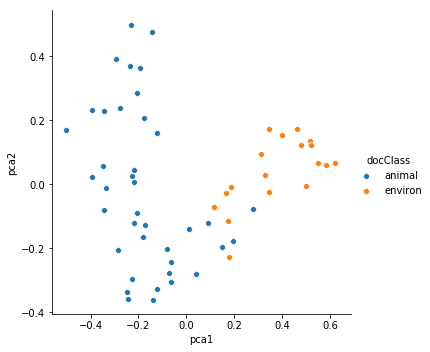

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(x_vars=['pca1'], y_vars=['pca2'], data=mergeData, hue="docClass", size=5)

In [27]:
textFrame = pd.DataFrame(features, columns = word)
textFrame.head()
len(features)

57

In [28]:
allF = features.flatten()
nonZero = allF[np.nonzero(allF)]
m = np.median(nonZero)

In [29]:
allF[np.nonzero(allF)]

array([0.00205349, 0.00753411, 0.00078364, ..., 0.00166373, 0.00313949,
       0.0004944 ])

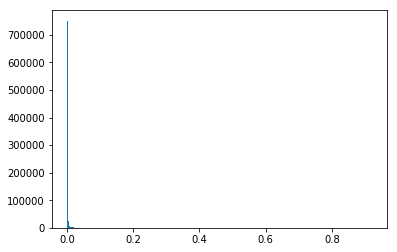

0.000566379902350867

In [30]:
plt.hist(nonZero, bins=500)
plt.show()
m

In [31]:
m = 0.1
dataset = list()
for i in range(len(features)):
    temp = textFrame.columns.values[[textFrame.iloc[i] >= m]]
    dataset.append(temp.tolist())

D:\Anaconda3\envs\my_it30days\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


In [32]:
for i in range(len(features)):
    print(dataset[i])

['下鄉', '之心', '動物', '可以', '台灣', '大家', '我們', '捐款', '支持', '活動', '活動中心', '流浪', '結紮', '絕育', '駐紮']
['動物', '協會', '愛貓', '收容所', '社團', '認養', '貓咪', '貓志工']
['中華民國', '保護', '八里', '動物', '勤美璞', '協會', '小犬', '我們', '林昆', '毛孩', '活動', '畫乙張', '畫作', '米克斯', '認養', '領我養']
['並先', '來訊', '儘快', '協會', '問卷', '回信', '回電', '填文', '幼犬', '我們', '狗狗', '白紙', '給你', '義工', '花園', '詳讀', '認養', '送養']
['動物', '協會', '可以', '台灣', '大家', '我們', '民眾', '狗狗', '虐待', '調查', '防止', '飼主']
['公民', '協作', '參與', '台灣', '專案', '政府', '社群', '科技', '議程', '資料', '開放', '開源', '零時', '黑客']
['保存', '古都', '台南', '基金會', '報名', '好務', '建築', '我們', '文化', '欣力', '歷史', '老屋', '老房子']
['中心', '傷鳥', '台北', '大家', '幼鳥', '我們', '救傷', '義工', '野鳥', '鳥兒', '鳥會', '鳥類']
['公園', '台北', '活動', '濕地', '管理處', '自然', '藝術', '野鳥', '關渡', '鳥會']
['代拍', '動物', '協會', '台南市', '善化', '收容所', '時分', '東昌', '流浪', '狗狗', '至時', '認養', '請轉', '謝謝', '走失', '關懷']
['不要', '公告', '分享', '動物', '孩子', '家裡', '希望', '收容所', '至時', '認養', '轉貼自', '遺照']
['不再', '動物', '協會', '台灣', '流浪', '結紮', '認養']
['保育', '保護', '動物', '協進會', '可以', '台灣', '孩子', '幫助', '愛心

In [34]:
# Apriori: https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
graph = df.T
graph.columns = mergeData['className']

In [35]:
graph.head()

className,"""HOTAC","""愛貓協會(NGO",APA中華民國保護動物協會,Rose的流浪動物花園,Taiwan SPCA 台灣防止虐待動物協會,g0v.tw 台灣零時政府,古都保存再生文教基金會,台北鳥會野鳥救傷中心,台北鳥會關渡自然公園管理處,台南市關懷流浪動物協會,...,台灣環境資訊協會 Taiwan Environmental Information Association (TEIA),台灣農村陣線,台灣農業讚,善耕-關懷台灣文教基金會,地球公民基金會,媽媽監督核電廠聯盟,我是人，我反核！,激進工作室 - Radicalization Studio,環境資訊中心,荒野保護協會
一起,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
三十,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
三重,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
下鄉,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
不再,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
from mlxtend.frequent_patterns import apriori

minsup = 0.01
apriori(graph, min_support = minsup, use_colnames=True)

,support,itemsets
0,0.038961,"(""HOTAC)"
1,0.020779,"(""愛貓協會(NGO)"
2,0.041558,(APA中華民國保護動物協會)
3,0.046753,(Rose的流浪動物花園)
4,0.031169,(Taiwan SPCA 台灣防止虐待動物協會)
5,0.036364,(g0v.tw 台灣零時政府)
6,0.033766,(古都保存再生文教基金會)
7,0.031169,(台北鳥會野鳥救傷中心)
8,0.025974,(台北鳥會關渡自然公園管理處)
9,0.041558,(台南市關懷流浪動物協會)


In [37]:
result = apriori(graph, min_support = minsup)
result

,support,itemsets
0,0.038961,(0)
1,0.020779,(1)
2,0.041558,(2)
3,0.046753,(3)
4,0.031169,(4)
5,0.036364,(5)
6,0.033766,(6)
7,0.031169,(7)
8,0.025974,(8)
9,0.041558,(9)


In [39]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(result, metric="confidence", min_threshold=0.7)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(44),(43),0.041558,0.049351,0.033766,0.8125,16.463816,0.031715,5.070130
1,"(0, 4)",(12),0.012987,0.041558,0.010390,0.8000,19.250000,0.009850,4.792208
2,"(4, 12)",(0),0.010390,0.038961,0.010390,1.0000,25.666667,0.009985,inf
3,"(0, 18)",(4),0.010390,0.031169,0.010390,1.0000,32.083333,0.010066,inf
4,"(0, 4)",(18),0.012987,0.018182,0.010390,0.8000,44.000000,0.010153,4.909091


In [40]:
rules = association_rules(result, metric="lift", min_threshold=1.2)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0),(4),0.038961,0.031169,0.012987,0.333333,10.694444,0.011773,1.453247
1,(4),(0),0.031169,0.038961,0.012987,0.416667,10.694444,0.011773,1.647495
2,(0),(11),0.038961,0.018182,0.010390,0.266667,14.666667,0.009681,1.338843
3,(11),(0),0.018182,0.038961,0.010390,0.571429,14.666667,0.009681,2.242424
4,(0),(12),0.038961,0.041558,0.015584,0.400000,9.625000,0.013965,1.597403


In [41]:
rules["antecedant_len"] = rules["antecedents"].apply(lambda x: len(x))
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
0,(0),(4),0.038961,0.031169,0.012987,0.333333,10.694444,0.011773,1.453247,1
1,(4),(0),0.031169,0.038961,0.012987,0.416667,10.694444,0.011773,1.647495,1
2,(0),(11),0.038961,0.018182,0.010390,0.266667,14.666667,0.009681,1.338843,1
3,(11),(0),0.018182,0.038961,0.010390,0.571429,14.666667,0.009681,2.242424,1
4,(0),(12),0.038961,0.041558,0.015584,0.400000,9.625000,0.013965,1.597403,1


In [42]:
out = rules[ (rules['antecedant_len'] >= 2) &
       (rules['confidence'] > 0.75) &
       (rules['lift'] > 1.2) ]
out.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
152,"(0, 4)",(12),0.012987,0.041558,0.01039,0.8,19.250000,0.009850,4.792208,2
154,"(4, 12)",(0),0.010390,0.038961,0.01039,1.0,25.666667,0.009985,inf,2
158,"(0, 18)",(4),0.010390,0.031169,0.01039,1.0,32.083333,0.010066,inf,2
159,"(0, 4)",(18),0.012987,0.018182,0.01039,0.8,44.000000,0.010153,4.909091,2
160,"(18, 4)",(0),0.010390,0.038961,0.01039,1.0,25.666667,0.009985,inf,2


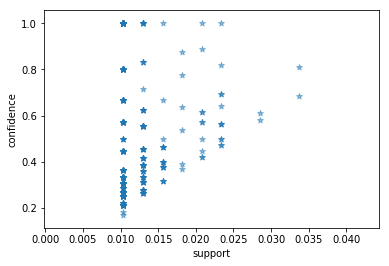

In [43]:
support = rules['support']
confidence = rules['confidence']
plt.scatter(support, confidence, alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [44]:
len(rules)
rules['antecedents'].head()

0     (0)
1     (4)
2     (0)
3    (11)
4     (0)
Name: antecedents, dtype: object

In [46]:
import networkx as nx
G = nx.DiGraph()
for i in range(len(mergeData)):
    G.add_node(i)
for i in range(len(rules['antecedents'])):
    currentFrom = list(rules['antecedents'][i])
    currentTo = list(rules['consequents'][i])
    for j in range(len(currentFrom)):
        G.add_edge(currentFrom[j], currentTo[0])

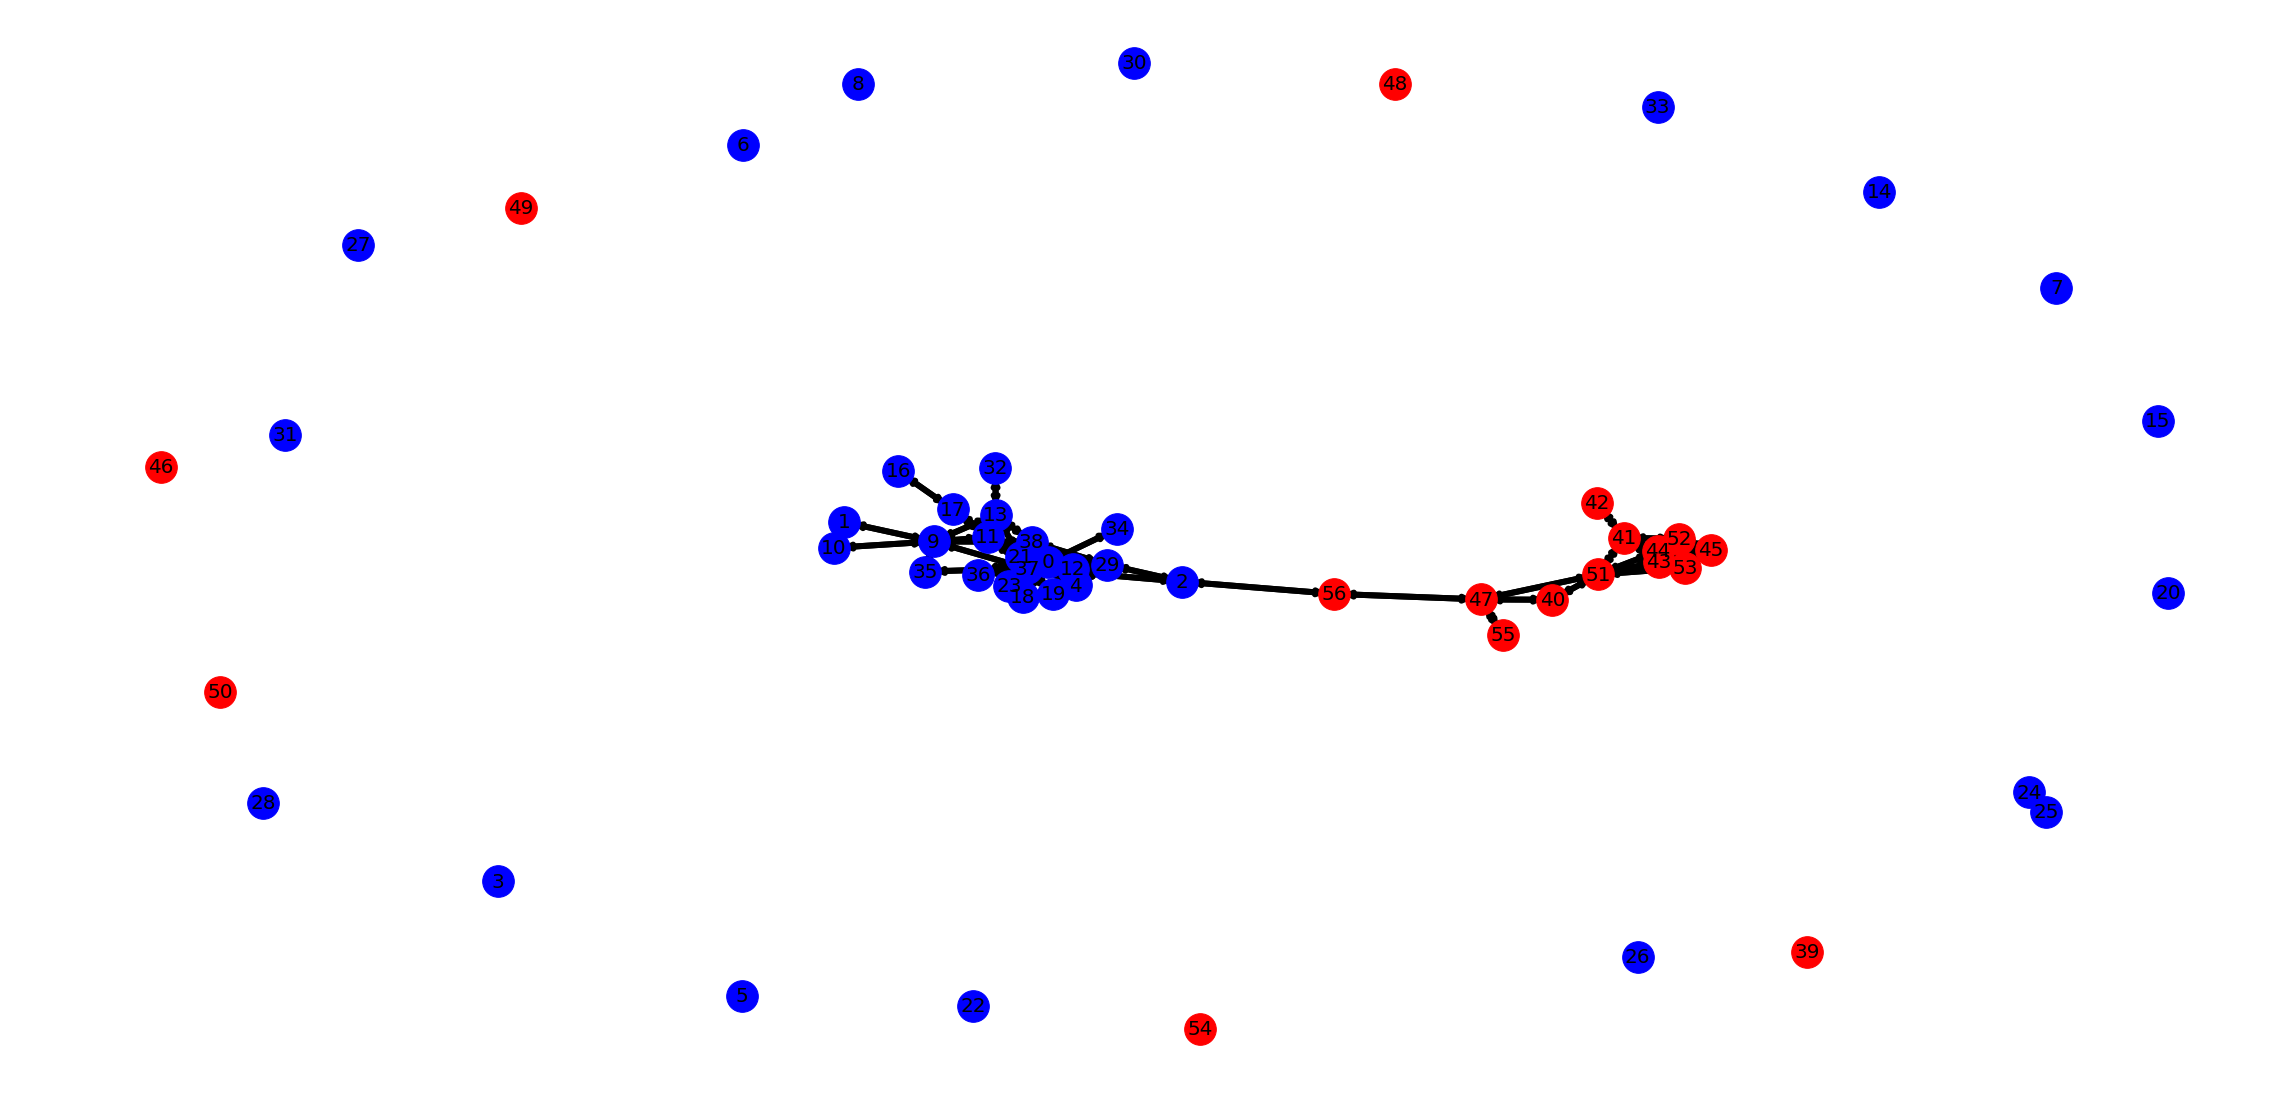

In [47]:
nodeListA = mergeData.index[mergeData['docClass'] == 'animal'].tolist()
nodeListB = mergeData.index[mergeData['docClass'] == 'environ'].tolist()

plt.figure(figsize=(40,20))

# positions for all nodes
pos = nx.fruchterman_reingold_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, nodelist=nodeListA, node_color="b", node_size=1000)
nx.draw_networkx_nodes(G, pos, nodelist=nodeListB, node_color="r", node_size=1000)
nx.draw_networkx_edges(G, pos, width=6)

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

plt.axis('off')
plt.savefig("weighted_graph.png") # save as png
plt.show() # display

In [48]:
# 獨立議題，和其他社團無關聯
list(nx.isolates(G))

[3, 5, 6, 7, 8, 14, 15, 20, 22, 26, 27, 28, 30, 31, 33, 39, 46, 48, 49, 50, 54]

In [49]:
# 小群體
from networkx.algorithms.approximation import dominating_set
dominating_set.min_edge_dominating_set(G)

{(0, 4),
 (1, 9),
 (2, 29),
 (11, 13),
 (12, 19),
 (16, 17),
 (18, 21),
 (23, 37),
 (24, 25),
 (40, 47),
 (41, 42),
 (43, 44),
 (45, 52),
 (51, 53)}

In [50]:
pd.DataFrame(graph.columns)

,className
0,"""HOTAC"
1,"""愛貓協會(NGO"
2,APA中華民國保護動物協會
3,Rose的流浪動物花園
4,Taiwan SPCA 台灣防止虐待動物協會
5,g0v.tw 台灣零時政府
6,古都保存再生文教基金會
7,台北鳥會野鳥救傷中心
8,台北鳥會關渡自然公園管理處
9,台南市關懷流浪動物協會
